# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você.*

Link kagle: https://www.kaggle.com/equeiroz/acidentes-rodovias-federais-brasil-jan07-a-jul19

Link do drive com os dados integrados: https://drive.google.com/drive/folders/1T5AcEd15lx59zlK-aHLN3Tdnq4PNbD7S?usp=sharing

Essa base despertou meu interesse por se tratar de uma realidade brasileira. As causas de acidentes ocorrem pelas condições das estradas? Pelas imperícias dos motoristas? Essas são algumas das perguntas que passam na minha cabeça quando vejo uma notícia de acidente. Logo, é interessante ter essas respostas através da análise dos dados.

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


*Descrição da base e suas variáveis*

Essa base é composta pelos dados da Polícia Rodoviária Federal sobre os registros de ocorrências de acidentes nas rodovias federais brasileiras no período de 01/2007 a 07/2019. Possui 24 colunas e 1.758.765 registros.

CATEGÓRICAS:

- uf
- municipio
- causa_acidente
- tipo_acidente
- classificacao_acidente
- fase_dia
- sentido_via
- condicao_metereologica
- tipo_pista
- tracado_via
- uso_solo

CONTÍNUAS:

- id
- data_inversa
- horario
- br

DISCRETAS:

- pessoas
- mortos
- feridos_leves
- feridos_graves
- ilesos
- ignorados
- feridos
- veiculos

### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [1]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('acidentes-rodovia-br.csv', low_memory=False)
df.drop(['Unnamed: 0', 'uso_solo'], axis=1, inplace=True)
df.head(5)

,id,data_inversa,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,1035523.0,2012-01-01,15:45:00,SC,282,513.7,XAXIM,Velocidade incompatível,Saída de Pista,Com Vítimas Feridas,...,Simples,Curva,2,0,1,0,1,0,1,1
1,1035527.0,2012-01-01,03:00:00,SC,280,188,MAFRA,Ingestão de álcool,Colisão lateral,Com Vítimas Feridas,...,Simples,Curva,3,0,1,0,2,0,1,2
2,1035528.0,2012-01-01,05:40:00,SC,116,1.5,MAFRA,Velocidade incompatível,Colisão com objeto fixo,Sem Vítimas,...,Simples,Cruzamento,1,0,0,0,1,0,0,1
3,1035530.0,2012-01-01,06:00:00,RO,364,616.5,ITAPUÃ DO OESTE,Outras,Saída de Pista,Com Vítimas Feridas,...,Simples,Reta,1,0,1,0,0,0,1,1
4,1035533.0,2012-01-01,16:30:00,RJ,101,47,CAMPOS DOS GOYTACAZES,Ingestão de álcool,Queda de motocicleta / bicicleta / veículo,Com Vítimas Feridas,...,Simples,Reta,1,0,1,0,0,0,1,1


In [5]:
df.drop(df[df['uf'] == '(null)'].index, inplace=True)
df.drop(df[df['causa_acidente'] == '(null)'].index, inplace=True)
df.drop(df[df['tipo_acidente'] == '(null)'].index, inplace=True)
df.drop(df[df['classificacao_acidente'] == '(null)'].index, inplace=True)
df.drop(df[df['fase_dia'] == '(null)'].index, inplace=True)
df.drop(df[df['sentido_via'] == '(null)'].index, inplace=True)
df.drop(df[df['condicao_metereologica'] == '(null)'].index, inplace=True)
df.drop(df[df['tipo_pista'] == '(null)'].index, inplace=True)
df.drop(df[df['tracado_via'] == '(null)'].index, inplace=True)

In [6]:
print('Números de linhas:', df.shape[0])
print('Números de colunas:', df.shape[1])
print('Colunas presentes: ')
print(df.columns)

Números de linhas: 1758604
Números de colunas: 23
Colunas presentes: 
Index(['id', 'data_inversa', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos'],
      dtype='object')


In [7]:
print('Porcentagem de dados ausentes:')

valor_faltante = df.isnull().sum()
celulas = np.product(df.shape)
print(round((valor_faltante.sum()/celulas) * 100, 3), '%')

Porcentagem de dados ausentes:
0.002 %


In [7]:
df.dropna(inplace=True)

In [9]:
print('Porcentagem de dados duplicados: ')
valor_duplicado = df.duplicated().sum()
print(round((valor_duplicado.sum()/celulas) * 100, 3), '%')

Porcentagem de dados duplicados: 
0.0 %


In [8]:
def cleanText(text):
    text = text.lower()
    text = text.strip()
    return text

In [10]:
df['municipio'] = df['municipio'].apply(cleanText)
df['causa_acidente'] = df['causa_acidente'].apply(cleanText)
df['tipo_acidente'] = df['tipo_acidente'].apply(cleanText)
df['classificacao_acidente'] = df['classificacao_acidente'].apply(cleanText)
df['fase_dia'] = df['fase_dia'].apply(cleanText)
df['sentido_via'] = df['sentido_via'].apply(cleanText)
df['condicao_metereologica'] = df['condicao_metereologica'].apply(cleanText)
df['tipo_pista'] = df['tipo_pista'].apply(cleanText)
df['tracado_via'] = df['tracado_via'].apply(cleanText)

In [16]:
df['id'] = df['id'].astype('int32')
df['mortos'] = df['mortos'].astype('int16')
df['ilesos'] = df['ilesos'].astype('int16')
df['pessoas'] = df['pessoas'].astype('int16')
df['feridos'] = df['feridos'].astype('int16')
df['veiculos'] = df['veiculos'].astype('int16')
df['ignorados'] = df['ignorados'].astype('int16')
df['feridos_leves'] = df['feridos_leves'].astype('int16')
df['feridos_graves'] = df['feridos_graves'].astype('int16')

In [17]:
df['data'] = df.data_inversa.map(str) + ' ' + df.horario

df.drop(['data_inversa', 'horario'], axis=1, inplace=True)

df['data'] = pd.to_datetime(df['data'])

df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month

In [20]:
# Balanceamento dos dados

df_2007_2018 = df[df['ano']!= 2019]
print('Números de linhas:', df_2007_2018.shape[0])
print('Números de colunas:', df_2007_2018.shape[1])
df_2007_2018['ano'].sort_values().unique()

Números de linhas: 1720498
Números de colunas: 24


array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


In [61]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

Text(0.5, 1.0, 'Porcentagem da classificação dos acidentes em relação às vítimas')

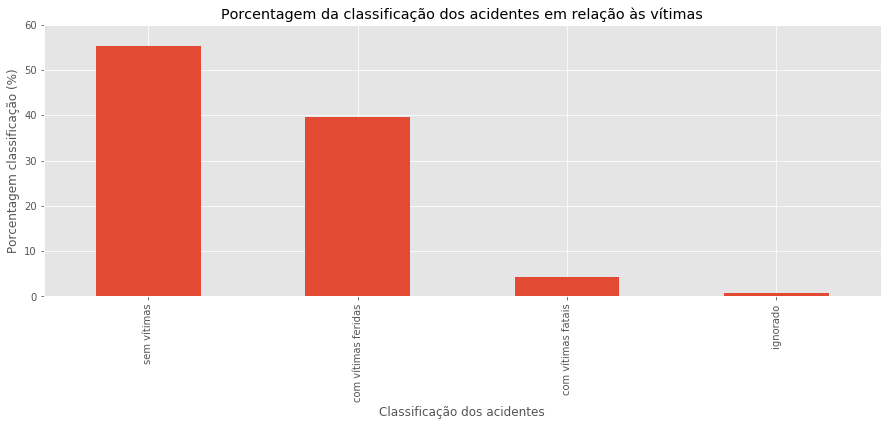

In [22]:
round((pd.value_counts(df_2007_2018['classificacao_acidente']) *100) / len(df_2007_2018), 2) .plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 60)

plt.ylabel('Porcentagem classificação (%)')
plt.xlabel('Classificação dos acidentes')
plt.title('Porcentagem da classificação dos acidentes em relação às vítimas')

Text(0.5, 1.0, 'Porcentagem de acidentes por estado')

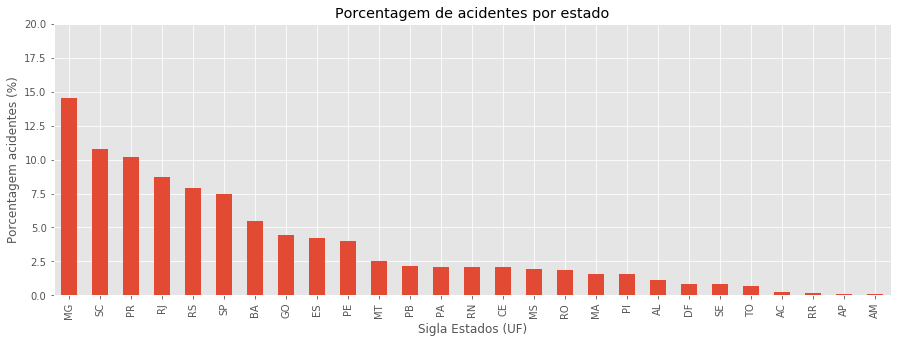

In [63]:
round((pd.value_counts(df_2007_2018['uf']) * 100) / len(df_2007_2018), 2).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 20)

plt.ylabel('Porcentagem acidentes (%)')
plt.xlabel('Sigla Estados (UF)')
plt.title('Porcentagem de acidentes por estado')

Text(0.5, 1.0, 'As 10 cidades mineiras com maior ocorrência de acidentes')

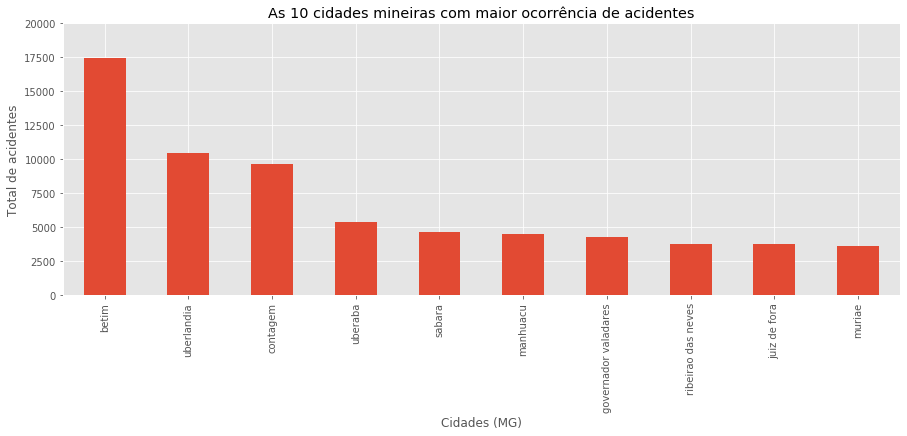

In [26]:
municipios = df_2007_2018[df_2007_2018['uf'] == 'MG']
pd.value_counts(municipios['municipio']).sort_values(ascending=False).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 20000)

plt.ylabel('Total de acidentes')
plt.xlabel('Cidades (MG)')
plt.title('As 10 cidades mineiras com maior ocorrência de acidentes')

Text(0.5, 1.0, 'As 10 principais causas de acidentes')

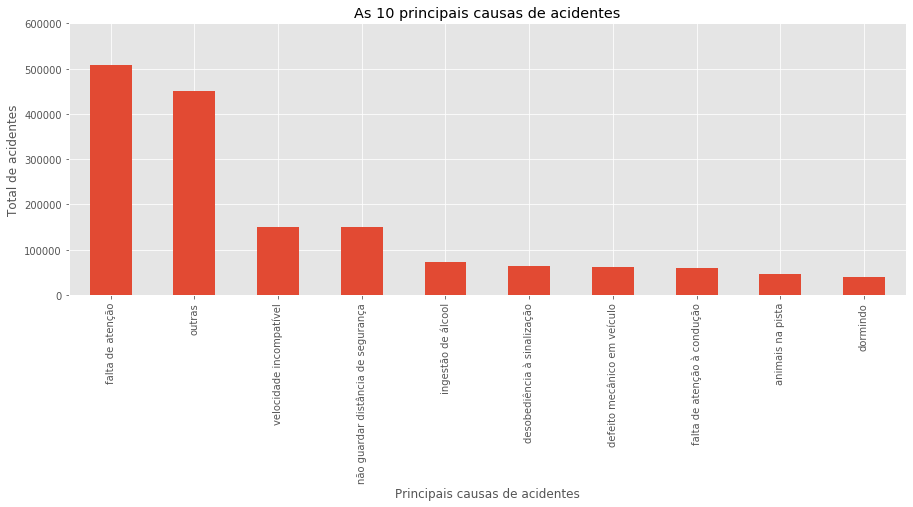

In [27]:
pd.value_counts(df_2007_2018['causa_acidente']).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 600000)

plt.ylabel('Total de acidentes')
plt.xlabel('Principais causas de acidentes')
plt.title('As 10 principais causas de acidentes')

Text(0.5, 1.0, 'Quantidade de mortos por UF entre 2007 e 2018')

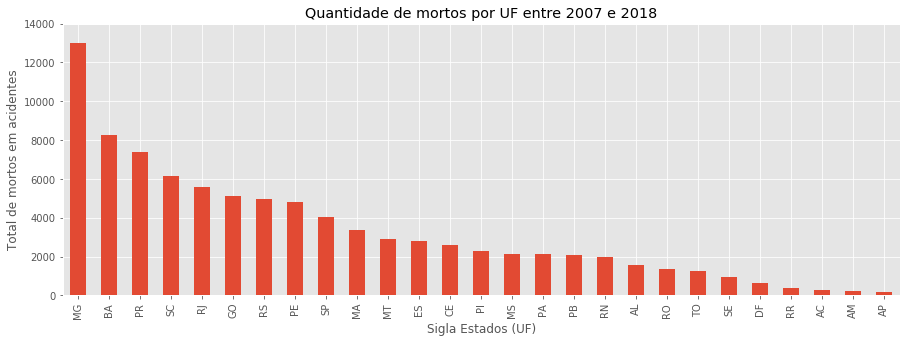

In [28]:
df_2007_2018.groupby(['uf'])['mortos'].sum().sort_values(ascending=False).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 14000)

plt.ylabel('Total de mortos em acidentes')
plt.xlabel('Sigla Estados (UF)')
plt.title('Quantidade de mortos por UF entre 2007 e 2018')

Text(0.5, 1.0, 'Quantidade de acidentes por ano (2007-2018)')

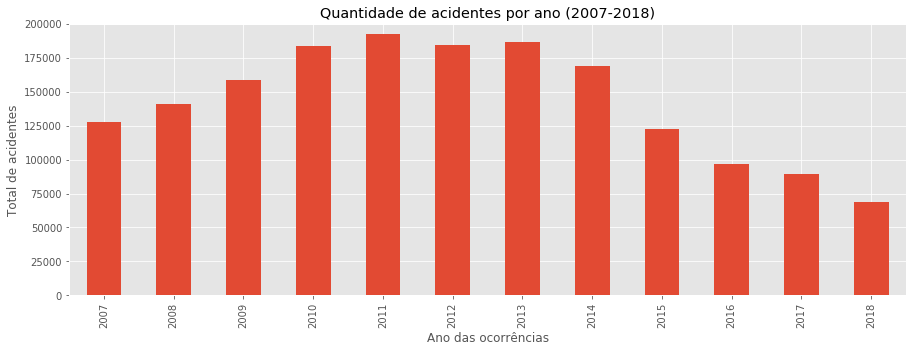

In [29]:
df_2007_2018.groupby(['ano'])['id'].count().plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 200000)

plt.ylabel('Total de acidentes')
plt.xlabel('Ano das ocorrências')
plt.title('Quantidade de acidentes por ano (2007-2018)')

Text(0.5, 1.0, 'Quantidade de acidentes por mês (2007-2018)')

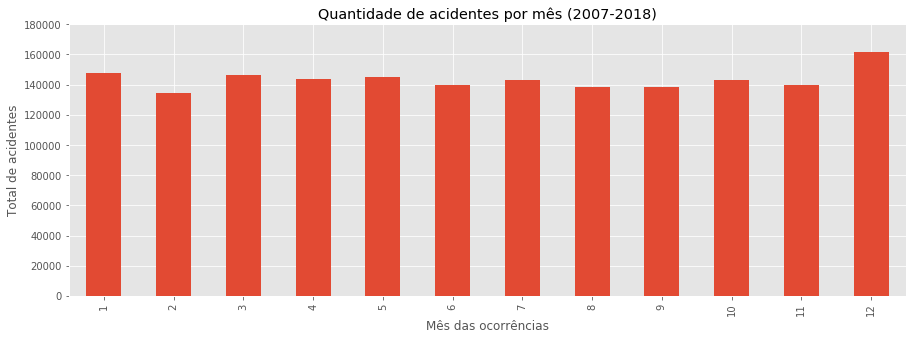

In [30]:
df_2007_2018.groupby(['mes'])['id'].count().plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 180000)

plt.ylabel('Total de acidentes')
plt.xlabel('Mês das ocorrências')
plt.title('Quantidade de acidentes por mês (2007-2018)')

Text(0.5, 1.0, 'Fase do dia em que ocorreram os acidentes')

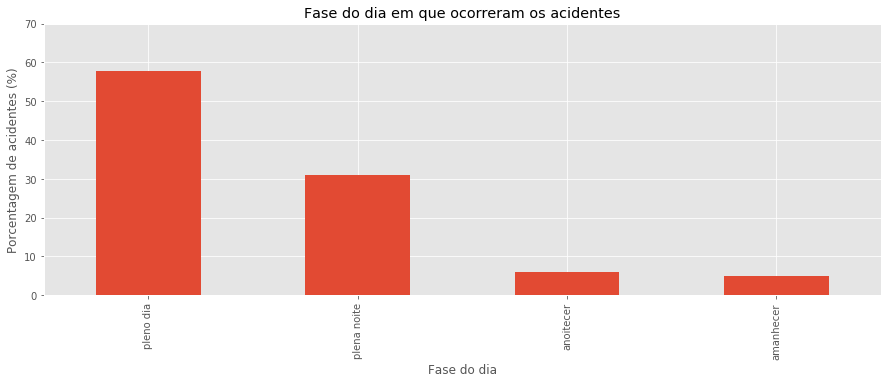

In [31]:
round((pd.value_counts(df_2007_2018['fase_dia'])*100)/len(df_2007_2018), 2).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 70)

plt.ylabel('Porcentagem de acidentes (%)')
plt.xlabel('Fase do dia')
plt.title('Fase do dia em que ocorreram os acidentes')

Text(0.5, 1.0, 'Traçado das vias onde ocorreram os acidentes')

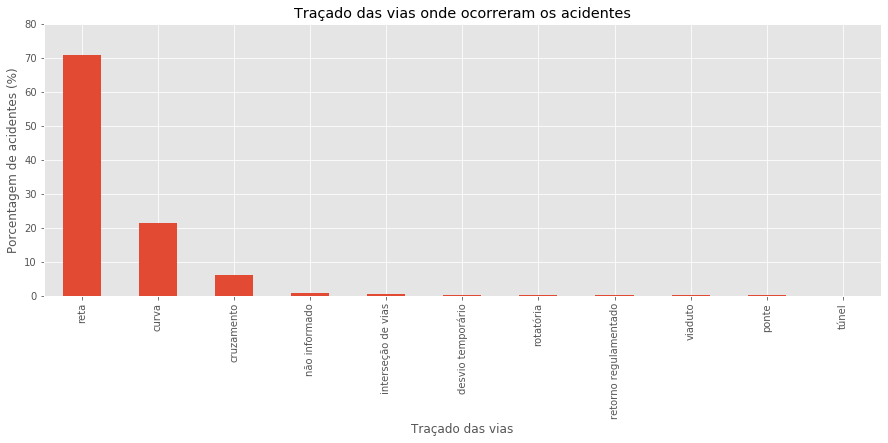

In [32]:
round((pd.value_counts(df_2007_2018['tracado_via'])*100)/len(df_2007_2018), 2).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 80)

plt.ylabel('Porcentagem de acidentes (%)')
plt.xlabel('Traçado das vias')
plt.title('Traçado das vias onde ocorreram os acidentes')

Text(0.5, 1.0, 'Top 5 da quantidade de veículos envolvidos nas ocorrências de acidentes')

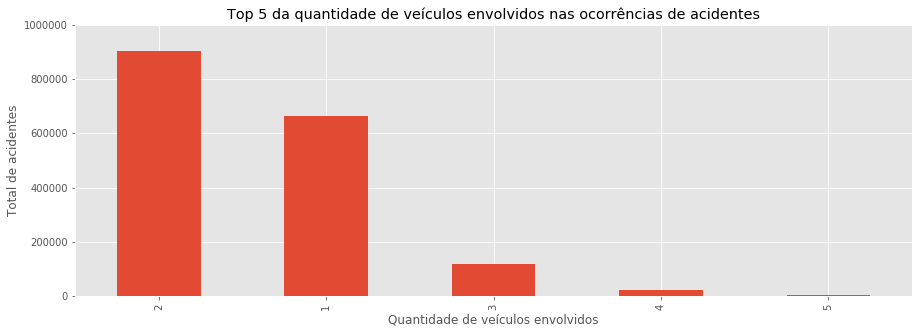

In [34]:
df_2007_2018.groupby(['veiculos'])['id'].count().sort_values(ascending=False).head(5).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 1000000)

plt.ylabel('Total de acidentes')
plt.xlabel('Quantidade de veículos envolvidos')
plt.title('Top 5 da quantidade de veículos envolvidos nas ocorrências de acidentes')

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >10000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [82]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [35]:
df_corr = df_2007_2018.drop(['id', 'mes', 'ano'], axis=1)
df_corr.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
pessoas,1.0,0.22,0.53,0.35,0.58,0.19,0.61,0.46
mortos,0.22,1.0,0.054,0.17,-0.081,0.05,0.13,0.017
feridos_leves,0.53,0.054,1.0,0.12,-0.18,0.0039,0.88,-0.012
feridos_graves,0.35,0.17,0.12,1.0,-0.15,0.025,0.57,0.0088
ilesos,0.58,-0.081,-0.18,-0.15,1.0,-0.093,-0.22,0.54
ignorados,0.19,0.05,0.0039,0.025,-0.093,1.0,0.015,0.13
feridos,0.61,0.13,0.88,0.57,-0.22,0.015,1.0,-0.0055
veiculos,0.46,0.017,-0.012,0.0088,0.54,0.13,-0.0055,1.0


In [36]:
'''
0.9 a 1 positivo ou negativo indica uma correlação muito forte.
0.7 a 0.9 positivo ou negativo indica uma correlação forte.
0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
0 a 0.3 positivo ou negativo indica uma correlação desprezível 
'''

'\n0.9 a 1 positivo ou negativo indica uma correlação muito forte.\n0.7 a 0.9 positivo ou negativo indica uma correlação forte.\n0.5 a 0.7 positivo ou negativo indica uma correlação moderada.\n0.3 a 0.5 positivo ou negativo indica uma correlação fraca.\n0 a 0.3 positivo ou negativo indica uma correlação desprezível \n'

In [30]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
#Qtde de mortos x veículos

df_2007_2018['mortos'].corr(df_2007_2018['veiculos'])

0.00652823269934641

In [ ]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
#Codição meteorológica x  Qtde de acidentes


In [ ]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.


### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

Podemos inferir, de acordo com os dados, que do total de acidentes compreendidos entre janeiro de 2007 e dezembro de 2018:

- Aproximadamente, 55% dos acidentes foram classificados como sem vítimas.
- Dentre os estados, Minas Gerais possui a maior % de acidentes (14,5%), provavelmente por possuir a maior malha rodoviária do país.
- Em MG, a cidade em que ocorre mais acidentes é Betim (17.465).
- A principal causa de acidentes é a falta de atenção, com um total de 507.431 ocorrências nesse período.
- Minas Gerais possui a maior quantidade de mortes em acidentes nas rodovias com um total de 13.012 falecidos.
- Houve um aumento gradativo das ocorrências de acidentes entre 2007 e 2011. Tivemos uma queda significativa em 2012 e após um aumento em 2013, os ocorrências voltaram a cair e mativeram esse padrão de queda até o ano 2018.
- Em média, 57% dos acidentes ocorreram em pleno dia.
- Cerca de 70% foram em pistas com traçado reto.
- A maioria dos acidentes envolveram dois veículos (904.764).
- Dezembro e Janeiro são os meses com maiores registros de ocorrências.


Esses são os dados que considero mais inportante na análise, pois representam os pontos nos quais focar para o desenvolvimento de uma tratativa do problema.